# Measuring Max Drawdown

* We ended thast session with a discussion of a risk-adjusted measure that we called the sharpe ratio.
* We are going now to look at another measure of risk, which is not volatility
* Volatility is just a standard deviation. 
* If you deviate from the mean on the upside, well that's actually not a bad thing
* This line of thought says: risk is the possibility of losing money.
* It's reasonable point of view.

## What is *Max Drawdown*?

* The Max Drowdown is the maximum loss from the previous hig to a subsequent low:
* Buy at its highest value - Sold a th the bottom
* The **worst possible return** you could have seen if you "bought hig. Sold low."

## Constructing A Wealth Index

1. Computing drawdowns is to construct a *wealth index*: hypothetical buy-and-hold investment in the asset
2. Look at the prior peak at any point in time

    * The distance between the green line to the blue line at any point in time
    * It is how much you feel you have lost
    * It is very consistent with a lot of behavioral effects that we know we are subject to.
    
3. We can plot the drwdowns over time to be able to see how long it take to recover from the drawdowns.

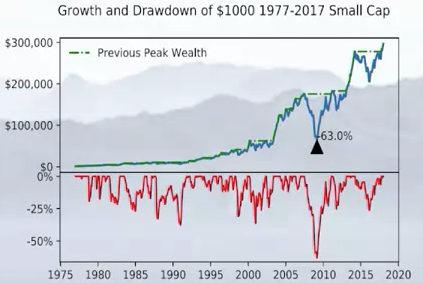

## Risk Adjustment Ratio using Drawdown

The **Calmar Ratio** is defined as the raio of the annualized return over the trailing 36 months to the maximum drawdoen over those trailing 36 months

## Some Cautionary Notes about Drawdowns

It is important to note that they are a far from perfect measure:

1. For instance: they are entirely defined by two points and hence are very sensitive to outliers
2. They depend on the frequency of observations in general: A very deep drawdown on a daily or weekly basis might almost completely disapper or move to very different location based on monthly data

In spite of these shortcomings, Drawdowns are closely monitored and popular amongst prectitioners even though other meausers like **VAR** and *CVAR* are more robust measures of the extreme risk.

## Lab Session

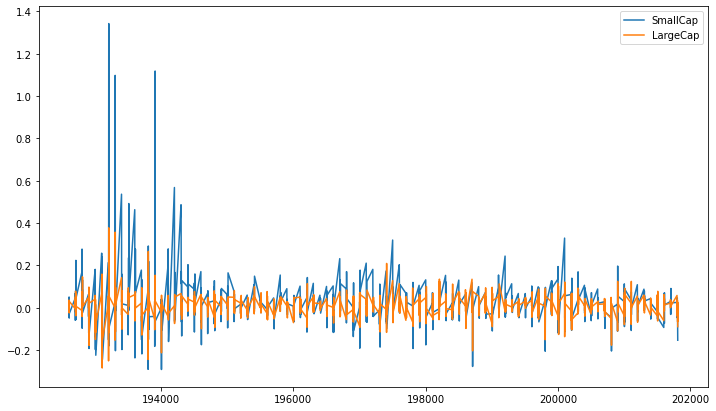

In [5]:
import pandas as pd
me_m = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv",
                  header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']

rets = rets/100
rets.plot(figsize=(12,7));

In [6]:
# The dates are not rendered in dates format 
# inspite the parse_dates=True
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [7]:
rets.index = pd.to_datetime(rets.index, format='%Y%m') 

In [8]:
# Let's see if it works:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [9]:
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [10]:
# Convert dates into monthly periods
rets.index = rets.index.to_period('M')

In [11]:
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [12]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


In [13]:
# Compute Drawdons:
# 1. Compute a wealth index
# 2. Compute previous peaks
# 3. Compute drawdown = which is the wealth value as percentage to the previous peak

In [14]:
# 1. Wealth index = the value of a portfolio as it compounds over time
# Let's start with $1,000
wealth_index = 1_000 * (1 + rets['LargeCap']).cumprod()
wealth_index

1926-07    1.032900e+03
1926-08    1.071117e+03
1926-09    1.078294e+03
1926-10    1.052091e+03
1926-11    1.080498e+03
               ...     
2018-08    4.175915e+06
2018-09    4.212246e+06
2018-10    3.935501e+06
2018-11    4.035069e+06
2018-12    3.675948e+06
Freq: M, Name: LargeCap, Length: 1110, dtype: float64

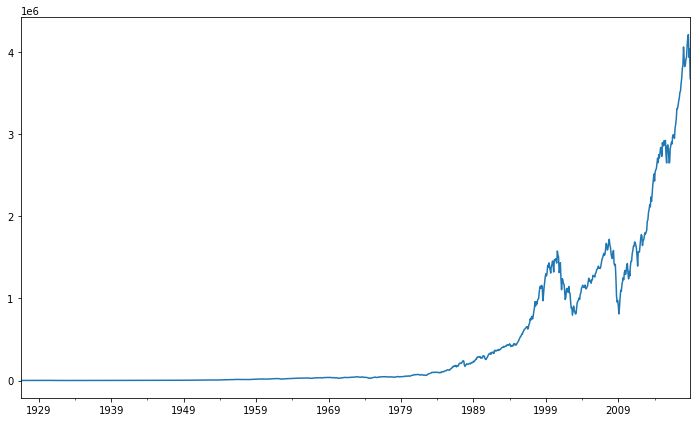

In [15]:
wealth_index.plot(figsize=(12,7));

In [16]:
# Step 2
previous_peaks = wealth_index.cummax()

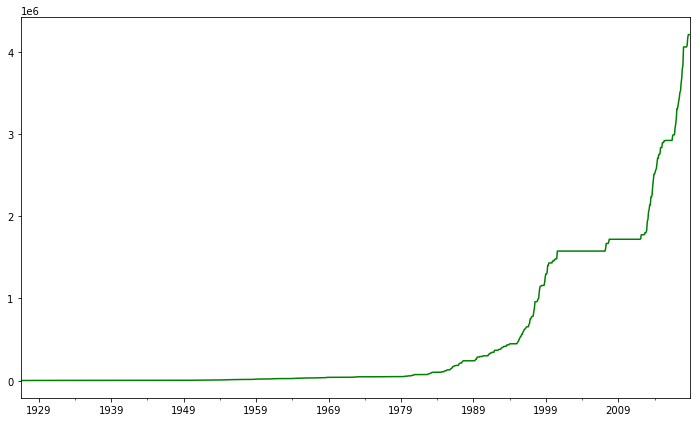

In [24]:
previous_peaks.plot(figsize=(12,7), c='green');

<AxesSubplot:>

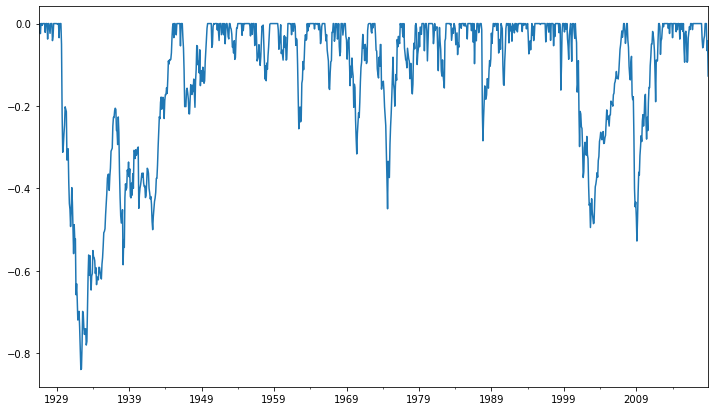

In [28]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot(figsize=(12, 7))

In [29]:
drawdown.min()

-0.8400375277943123

In [31]:
# the minimum since 1975:
drawdown['1975':].min()

-0.5280945042309304

In [32]:
# Howver we need the index:
drawdown['1975'].idxmin()

Period('1975-01', 'M')

In [58]:
def drawdown(return_series: pd.Series):
    """
    Takes a times series of asset returns
    Computes and returns ad DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """
    
    wealth_index = 1_000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        'Wealth': wealth_index,
        'Peaks': previous_peaks,
        'Drawdown': drawdowns
    })

In [59]:
drawdown(rets["LargeCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


<AxesSubplot:>

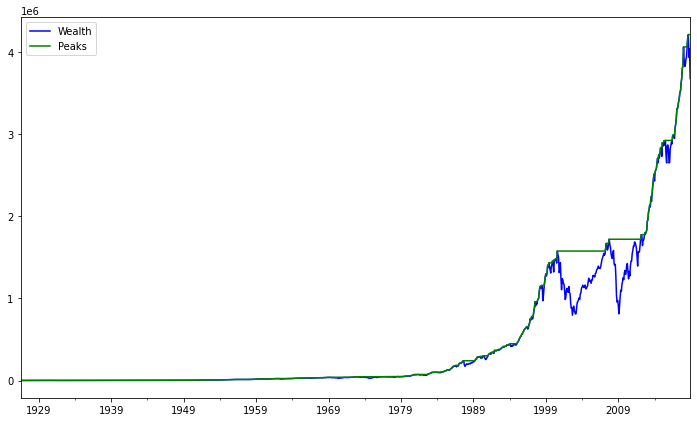

In [60]:
# Let's show wealth and peaks in a plot
drawdown(rets['LargeCap'])[['Wealth', 'Peaks']].plot(figsize=(12, 7), color=['b', 'g'])

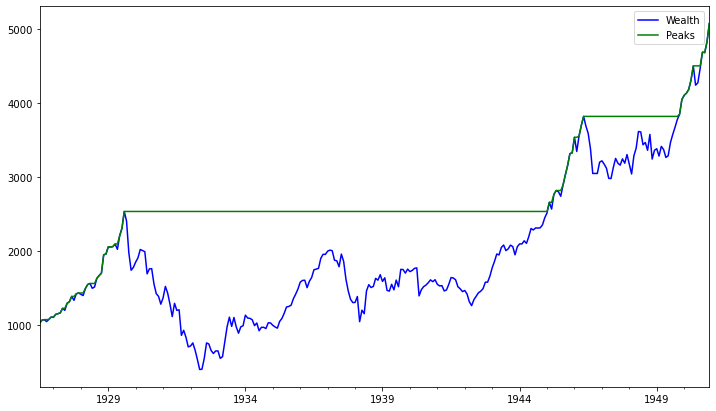

In [61]:
# up to 1950
drawdown(rets.loc[:"1950"]["LargeCap"])[["Wealth", "Peaks"]].plot(figsize=(12, 7), color=['b', 'g']);

In [62]:
drawdown(rets["LargeCap"])['Drawdown'].min()

-0.8400375277943123

In [63]:
drawdown(rets["SmallCap"])['Drawdown'].min()

-0.8330007793945303

In [64]:
drawdown(rets["SmallCap"])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [65]:
drawdown(rets["LargeCap"])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [67]:
# Let's see if we can find other markets crashes in the data
drawdown(rets.loc["1940":]["LargeCap"])['Drawdown'].idxmin()

Period('2009-02', 'M')

In [68]:
# Let's see if we can find other markets crashes in the data
drawdown(rets.loc["1940":]["SmallCap"])['Drawdown'].idxmin()

Period('1974-12', 'M')